# REAL TIME FACE EXPRESSION 

- DATA TAKEN FROM KAGGLE 
- First we preprocess the image and convert the image into processed pickle file.
- We use the Gray scale for image preprocess
- And resize the image into 48x48


## IMPORTING LIBRARY

In [1]:
import os
import pickle
import numpy as np
import cv2
import matplotlib.pyplot as plt

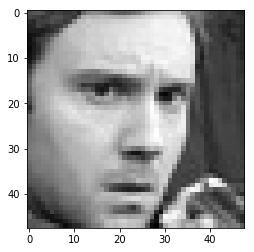

In [2]:
DATADIR = "C:\\Users\\SAMEER\\Downloads\\car\\Real_Time_Face_Expression\\Images\\train"
CATEGORIES=["angry", "disgust","fear","happy","neutral","sad","surprise"]

for category in CATEGORIES:
    path= os.path.join(DATADIR, category) #path to cats or dogs
    for img in os.listdir(path):
        img_array= cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap= 'gray')
        plt.show()
        break
    break

In [3]:
print(img_array)

[[ 72  78  81 ...  52  43  40]
 [ 65  62  59 ...  55  52  45]
 [ 47  42  60 ...  47  54  49]
 ...
 [ 91  65  46 ...  74  54  43]
 [ 76  80  76 ... 108  69  46]
 [ 77  74  81 ... 105 108  82]]


In [4]:
print(img_array.shape)

(48, 48)


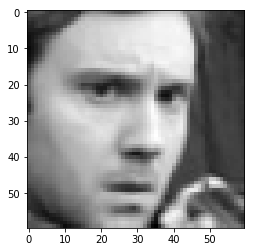

In [5]:
IMZ_SIZE= 60
new_array= cv2.resize(img_array, (IMZ_SIZE, IMZ_SIZE))
plt.imshow(new_array, cmap= 'gray')
plt.show()

In [6]:
training_data=[]

def create_training_data():
    for category in CATEGORIES:
        path= os.path.join(DATADIR, category) #path to cats or dogs
        class_num= CATEGORIES.index(category)
        for img in os.listdir(path):
          try:
            img_array= cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array= cv2.resize(img_array, (IMZ_SIZE, IMZ_SIZE))
            training_data.append([new_array, class_num])
          except Exception as e:
               pass
        
create_training_data()

In [7]:
print(len(training_data))

28821


In [8]:
import random

random.shuffle(training_data)

In [9]:
for sample in training_data[:10]:
    print(sample[1])

6
4
4
6
2
5
0
0
4
3


In [10]:
x=[]
y=[]

In [11]:
for features, label in training_data:
    x.append(features)
    y.append(label)
x= np.array(x).reshape(-1, IMZ_SIZE, IMZ_SIZE, 1) # 1<- for grayscale image

In [12]:
import pickle

pickle_out= open("x.pickle","wb")
pickle.dump(x, pickle_out)

pickle_out= open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

## Saving the processed image into pickle file for further process.